In [57]:
print("Hello there, welcome to my jupyter notebook (first github jupyter notebook)")

Hello there, welcome to my jupyter notebook (first github jupyter notebook)


In [ ]:
# Import libraries and read data (the original file was too big to upload to github - this is after I finished the project)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

link_for_dataset = 'https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download'

df = pd.read_csv("C:/Users/nasee/Desktop/code/other/movies_metadata.csv")
df

C:\Users\nasee\AppData\Local\Temp\ipykernel_14352\1135110277.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/nasee/Desktop/code/Movies_analysis/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
# cleaning the data
# for some reason release_date does not work
# removing columns which are not relevant to my questions 


df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')
movie = df[['original_title','genres','budget','revenue','vote_average','vote_count']].copy()

# To make the revenue look nicer
movie['revenue_str'] = movie['revenue'].apply(
    lambda x: f"{x/1e9:.2f}B" if pd.notnull(x) and x >= 1e9 else
              f"{int(x/1e6)}M" if pd.notnull(x) and x >= 1e6 else
              f"{int(x)}" if pd.notnull(x) else None
)

# Budget is string type so convert it to float 
movie['budget'] = pd.to_numeric(movie['budget'], errors='coerce')

# Seems like we will not be able to manipulate the vote_count as it is NaN type (could have been used for % of relevance)
movie.head()


,original_title,genres,budget,revenue,vote_average,vote_count,revenue_str
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,373554033.0,7.7,5415.0,373M
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,262797249.0,6.9,2413.0,262M
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,0.0,6.5,92.0,0
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,81452156.0,6.1,34.0,81M
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",0.0,76578911.0,5.7,173.0,76M


In [5]:
# Movie that has the highest revenue
print(movie.loc[movie['revenue'] == movie['revenue'].max(), ['original_title','revenue_str','vote_average']])

      original_title revenue_str  vote_average
14551         Avatar       2.79B           7.2


I expected "Avengers: Infinity War" to have a higher revenue but I think it is not in the data set 😭 

In [6]:

# Top 10 movies with the highest gross profits

movie['profit'] = movie['revenue'] - movie['budget'] 
movie['profit_str'] = movie['profit'].apply( # Make it look pretty
    lambda x: f"{x/1e9:.2f}B" if pd.notnull(x) and x >= 1e9 else
              f"{int(x/1e6)}M" if pd.notnull(x) and x >= 1e6 else
              f"{int(x/1e6)}M" if pd.notnull(x) and x < -1e6 else
              f"{int(x)}" if pd.notnull(x) else None
)

top_10 = movie.sort_values('profit', ascending=False)
top_10[['original_title','profit_str']][0:10]

,original_title,profit_str
14551,Avatar,2.55B
26555,Star Wars: The Force Awakens,1.82B
1639,Titanic,1.65B
25084,Jurassic World,1.36B
28830,Furious 7,1.32B
17818,The Avengers,1.30B
17437,Harry Potter and the Deathly Hallows: Part 2,1.22B
26558,Avengers: Age of Ultron,1.13B
22110,Frozen,1.12B
42222,Beauty and the Beast,1.10B


Avengers is absolute cinema ✋🤚

In [7]:
# top 10 movies that had extreme losses
movie.sort_values('profit')[['original_title','profit_str']][0:10]


,original_title,profit_str
21175,The Lone Ranger,-165M
32849,ポケモン・ザ・ムービーXY 光輪の超魔神 フーパ,-150M
14823,The Wolfman,-150M
43190,Band of Brothers,-125M
27656,The Pacific,-120M
7226,The Alamo,-119M
16788,Mars Needs Moms,-111M
44337,Valerian and the City of a Thousand Planets,-107M
30734,Double Wedding,-104M
6740,Brother Bear,-100M


I hope they recovered the debts

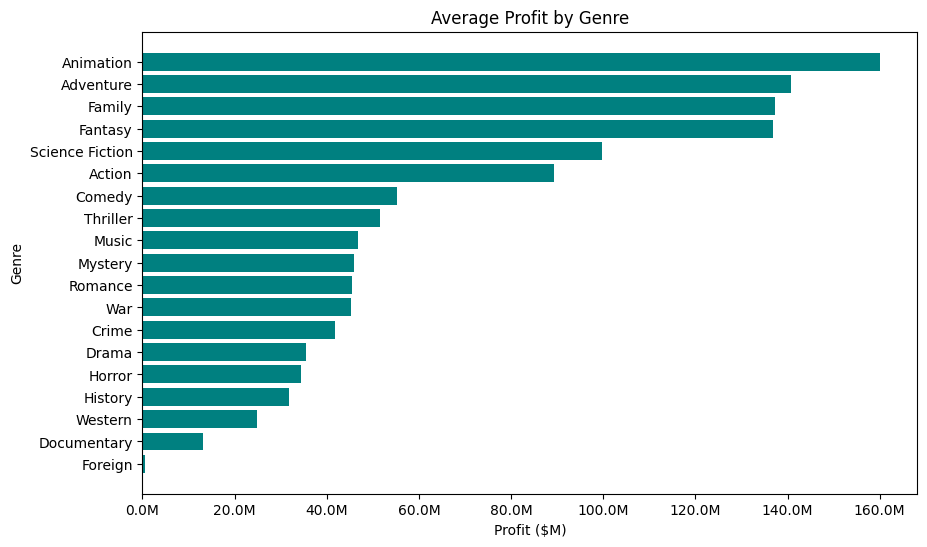

In [ ]:
# which genre makes the highest gross profits

# It seems like the genres column has a list of dicts but it is in str datatype, therefore it needs to be parsed to list
# using ast and cleaning genre
import ast

# Function to clean genres
def clean_genres(genre_str):
    if not isinstance(genre_str, str):  
        return []   # skip NaN / non-string
    try:
        parsed = ast.literal_eval(genre_str)  # convert string to list of dicts
    except (ValueError, SyntaxError):
        return []   # if it fails to parse
    if not isinstance(parsed, list):
        return []   # only accept lists
    valid = []
    for g in parsed:
        if isinstance(g, dict) and "name" in g and isinstance(g["name"], str):
            valid.append(g["name"])
    return valid

# Apply cleaning
movie["clean_genre"] = movie["genres"].apply(clean_genres)
relevant_movies = movie[(movie['budget'] != 0) & (movie['revenue'] != 0)]


# using dictionary = easier plot methods
genre_data = {}

def add_data(row):
    for x in row['clean_genre']:
        if x in genre_data:
            genre_data[x][0] += 1
            genre_data[x][1] += row['profit']
        else:
            genre_data[x] = [1,row['profit']]

relevant_movies.apply(add_data,axis = 1)

temp = {}
for genre, value in genre_data.items(): # Delete irrelavant ones and find average
    try:
        
        if value[0] == 1 or value[1] == 'nan':
            continue
        else:
            
            temp[genre] = round((value[1]/value[0]))
    except AttributeError:
        continue
sorted_items = sorted(temp.items(), key=lambda item: item[1])
sorted_data = dict(sorted_items)

# Time to plot 
genres = sorted_data.keys()
profit = sorted_data.values()

fig, ax = plt.subplots(figsize=(10, 6))
millions_formatter = mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
ax.xaxis.set_major_formatter(millions_formatter)                               
plt.barh(genres, profit, color = 'teal')
plt.xlabel("Profit ($M)")
plt.ylabel("Genre")
plt.title("Average Profit by Genre")
plt.show()

This includes all the losses as well from all around the world so it maybe irrelevant here.

In [52]:
# what are the top rated movies, the relevance should depend on the voter_count(it cannot be manipulated)
# we need to create a weighted rating column

minimum = 500 # min for vote_count
global_average = movie.loc[movie['vote_count'] > minimum, 'vote_average'].mean()

# Using IMDB's weighted score equation (I dont know how it works)
movie['relevance'] = (movie['vote_count']/(movie['vote_count']+minimum))*(movie['vote_count']+minimum)* movie['vote_average'] + (minimum/(movie['vote_count'] + minimum)) * global_average
movie.sort_values('relevance',ascending=False)[['original_title','vote_average','relevance']].head(10)


,original_title,vote_average,relevance
15480,Inception,8.1,114007.727433
12481,The Dark Knight,8.3,101832.959600
22879,Interstellar,8.1,90614.983635
17818,The Avengers,7.4,88800.265187
14551,Avatar,7.2,87221.062790
26564,Deadpool,7.4,84685.877532
2843,Fight Club,8.3,80327.725686
20051,Django Unchained,7.8,80316.907015
23753,Guardians of the Galaxy,7.9,79110.915278
292,Pulp Fiction,8.3,71961.361487


all of these movies are genuinely peak (ofc its cristopher nolan at the top)

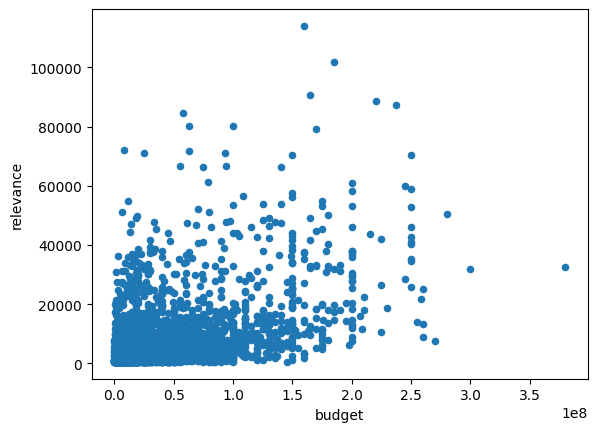

In [54]:
# Is there a correlation between budget and vote_average
# We now have relevance table so we will compare with that 
correlation = relevant_movies = movie[(movie['budget'] != 0) & (movie['revenue'] != 0) & (movie['relevance'] > 500)]
correlation.plot(x = 'budget', y = 'relevance', kind = 'scatter')
plt.show()
